<a href="https://colab.research.google.com/github/RubensCarvalhoRocha/nba-3pt-knn-regression/blob/main/nba_3pt_knn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Vai abrir uma janela para você subir o CSV
uploaded = files.upload()

Saving 2023_nba_player_stats.csv to 2023_nba_player_stats (1).csv


In [ ]:
import pandas as pd

# Leitura do datasheet
df = pd.read_csv('2023_nba_player_stats.csv')

# Visualizar as primeiras linhas
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Selecionar apenas as colunas de arremessos de 3 pontos
df_knn_3pt = df[["3PM", "3PA"]].copy()

#The total number of 3-point field goals made by the player	3PM
#The total number of 3-point field goals attempted by the player	3PA

# Visualizar as primeiras linhas
df_knn_3pt.head()

,3PM,3PA
0,240,686
1,66,200
2,185,541
3,58,168
4,47,171


In [ ]:
df_knn_3pt.corr()

,3PM,3PA
3PM,1.00000,0.99145
3PA,0.99145,1.00000


In [ ]:
# Tratar valores ausentes
df_knn_3pt.dropna(inplace=True)

In [ ]:
# Separar X e y
X_3pt = df_knn_3pt[["3PA"]]  # Tentativas de 3 pontos
y_3pt = df_knn_3pt["3PM"]    # Arremessos convertidos de 3

In [ ]:
# Normalizar os dados
scaler_3pt = StandardScaler()
X_3pt_scaled = scaler_3pt.fit_transform(X_3pt)

In [ ]:
# Dividir em treino e teste
X_train_3pt, X_test_3pt, y_train_3pt, y_test_3pt = train_test_split(X_3pt_scaled, y_3pt, test_size=0.2, random_state=42)

In [ ]:
# Treinar modelo KNN
knn_3pt = KNeighborsRegressor(n_neighbors=5)
knn_3pt.fit(X_train_3pt, y_train_3pt)


KNeighborsRegressor()

In [ ]:
# Fazer previsões e avaliar
y_pred_3pt = knn_3pt.predict(X_test_3pt)
mse_3pt = mean_squared_error(y_test_3pt, y_pred_3pt)
mae_3pt = mean_absolute_error(y_test_3pt, y_pred_3pt)
r2_3pt = r2_score(y_test_3pt, y_pred_3pt)

mse_3pt, mae_3pt, r2_3pt

#MSE: Erro médio ao quadrado

#MAE: Erro médio absoluto

#R²: Explica quanta variação dos dados o modelo conseguiu prever (quanto mais perto de 1, melhor)

(94.33925925925922, 6.151851851851852, 0.9795960391762651)

In [ ]:
import numpy as np

# Input via teclado
entrada = float(input("Digite a quantidade de tentativas de 3 pontos do jogador: "))

# Transformar e prever
entrada_transformada = scaler_3pt.transform(pd.DataFrame(np.array([[entrada]]), columns=["3PA"]))

previsao = knn_3pt.predict(entrada_transformada)

# Resultado
print(f"🏀 Previsão: aproximadamente {previsao[0]:.2f} bolas de 3 convertidas.")

Digite a quantidade de tentativas de 3 pontos do jogador: 30
🏀 Previsão: aproximadamente 7.60 bolas de 3 convertidas.


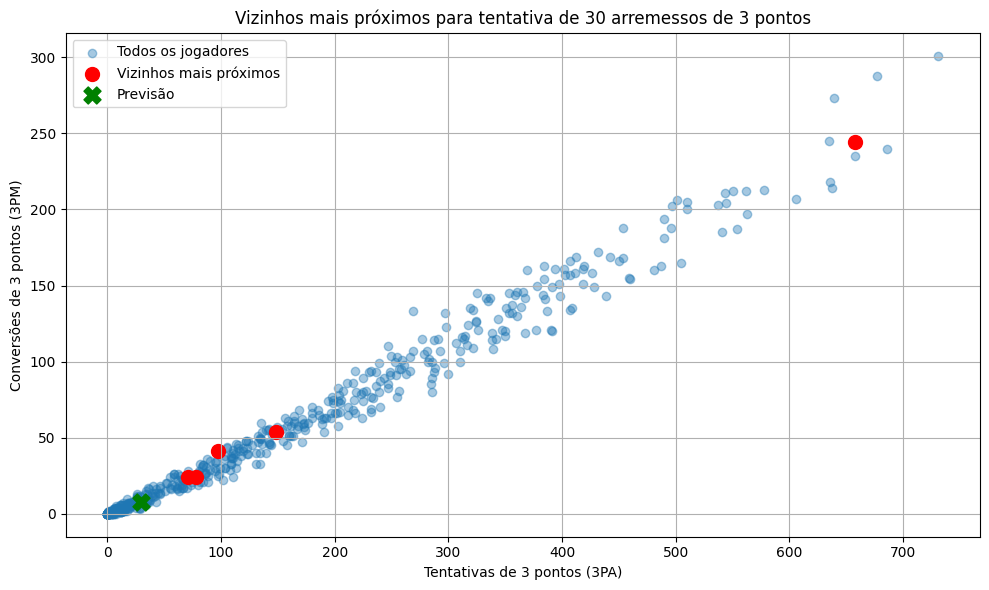

In [ ]:
import matplotlib.pyplot as plt

# Normalizar o valor para comparação
entrada_normalizada = scaler_3pt.transform(pd.DataFrame(np.array([[entrada]]), columns=["3PA"]))

# Obter os índices dos 5 vizinhos mais próximos
distancias, indices_vizinhos = knn_3pt.kneighbors(entrada_normalizada)

# Recuperar os dados originais dos vizinhos
vizinhos = df_knn_3pt.iloc[indices_vizinhos[0]]

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df_knn_3pt["3PA"], df_knn_3pt["3PM"], alpha=0.4, label="Todos os jogadores")
plt.scatter(vizinhos["3PA"], vizinhos["3PM"], color='red', label="Vizinhos mais próximos", s=100)
plt.scatter(entrada, prever_3pm := knn_3pt.predict(entrada_normalizada)[0], color='green', label="Previsão", marker='X', s=150)
plt.title("Vizinhos mais próximos para tentativa de 30 arremessos de 3 pontos")
plt.xlabel("Tentativas de 3 pontos (3PA)")
plt.ylabel("Conversões de 3 pontos (3PM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()